# **Newswire Classification:**

---


###   ** Predicting which Data Point (Newswires) belongs to which Topics (Category).**

###   ** Single Labeled Classification Example i.e. Any random newsfeed can be predicted to political news category or entertainment category or any of the remaining 44 categories but can not be assigned to two categories at a time.**
###   ** Data Set is not distributed equally into all categories but each category has atleast 10 examples in the training set.**
 









# **Loading  Reuters Data Set**

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)


# like IMDB, only the most 10000 most occuring words in the data will be considered model input

2113536/2110848 [==============================] - 1s 0us/step


### **Checking the length of 10000 words distributons into Train and Test data**




In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

### **Checking the values of Train data (just a Sample)**

In [8]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

### ** Decoding the previous checked sample**

In [74]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[10]])
decoded_newswire # one complete newswire at train_data index 0

# indices are subtracted by three
# because 0,1,2 are reserved indices for padding, start of sequence and unknown

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

In [75]:
reverse_word_index[242]  # word occuring at index i - 3 = 245 - 3 = 242 
                          # second word in the above newswire, found by its index number

'period'

In [105]:
# to check WORDS occuring at a series of indices
# in an orderly manner

d = reverse_word_index 

keys = (1,2,3)
d1 = {k: d[k] for k in keys}
d1

{1: 'the', 2: 'of', 3: 'to'}

# **Preparing the data**

### ** Encoding the data**

In [0]:
import numpy as np

In [0]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [117]:
# Our vectorize training data
x_train = vectorize_sequences(train_data)
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [119]:
# Our vectorize test data
x_test = vectorize_sequences(test_data)
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

### **One Hot Encoding the labels (Using Keras)**

In [0]:
from keras.utils.np_utils import to_categorical

# One will be placed at a label index

In [123]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_train_labels


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [124]:
one_hot_test_labels = to_categorical(test_labels)
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# **Building the Network**

---



###*   **Don't use smaller layers before the larger layers i.e. this will leads to make each layer as  "Information Bottleneck" **
###*   **I am using Dense layers aka Fully Connected Layers **



In [0]:
from keras import models
from keras import layers

### **Defining the model **

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

### **Compiling the model**

In [0]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

### **Defining Validation Set**

In [0]:
x_val = x_train[:1000] # 1000 samples as validation set (from index 0 to 999)
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# **Training the Model**

In [130]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 266us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 172us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 166us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 169us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.4581 - a

### **Plotting the training and validation loss**

In [0]:
import matplotlib.pyplot as plt

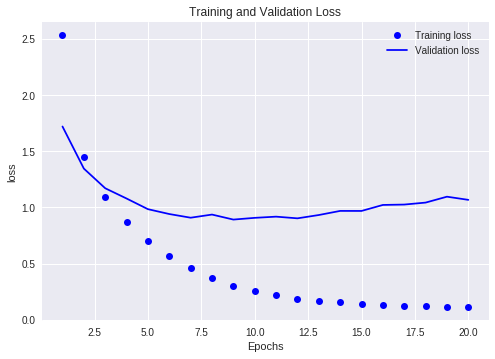

In [132]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

### **Plotting the training and validation loss**

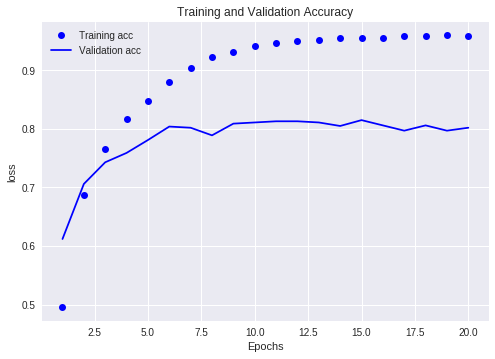

In [133]:
plt.clf()  #clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


# **Retraining the Model**

---

**Considering the overfitting( train_acc > Valid_acc) at 9 Epochs, a new model has been defined with no. of epochs = 9.**

In [147]:
# Redifinition of model
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

# Compilation of new model
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

# training the new model
model.fit(partial_x_train,
         partial_y_train,
         epochs = 9,
         batch_size = 512,
         validation_data = (x_val, y_val))
# results
results = model.evaluate(x_test, one_hot_test_labels)




Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 209us/step - loss: 2.6366 - acc: 0.5391 - val_loss: 1.7279 - val_acc: 0.6340
Epoch 2/9
7982/7982 [==============================] - 1s 170us/step - loss: 1.4114 - acc: 0.7102 - val_loss: 1.2984 - val_acc: 0.7140
Epoch 3/9
7982/7982 [==============================] - 1s 168us/step - loss: 1.0475 - acc: 0.7799 - val_loss: 1.1244 - val_acc: 0.7450
Epoch 4/9
7982/7982 [==============================] - 1s 169us/step - loss: 0.8249 - acc: 0.8274 - val_loss: 1.0162 - val_acc: 0.7880
Epoch 5/9
7982/7982 [==============================] - 1s 169us/step - loss: 0.6535 - acc: 0.8647 - val_loss: 0.9514 - val_acc: 0.7960
Epoch 6/9
7982/7982 [==============================] - 1s 168us/step - loss: 0.5177 - acc: 0.8919 - val_loss: 0.8963 - val_acc: 0.8160
Epoch 7/9
7982/7982 [==============================] - 1s 168us/step - loss: 0.4132 - acc: 0.9144 - val_loss: 0.8829 - val_acc: 0.8220
Epoch 8

# **Final Results**

In [148]:
results

[0.9705546382061626, 0.7853962600178095]

# **Accuracy of a Random Baseline**

In [0]:
import copy

In [143]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels.copy))) / len(test_labels)


0.0

# **Generating Predictions **

In [171]:
predictions = model.predict(x_test)
predictions[0]

array([3.41072359e-06, 6.94695846e-05, 8.83885059e-06, 9.52062130e-01,
       4.00291011e-02, 4.07079688e-06, 5.53550672e-06, 2.25702988e-05,
       2.56415899e-03, 2.03362788e-06, 1.58193416e-06, 3.41104227e-04,
       1.43056430e-04, 5.35931395e-05, 1.43669977e-05, 1.63771729e-05,
       2.33614861e-04, 3.90678542e-05, 1.12856775e-04, 1.94992521e-03,
       1.50486897e-03, 1.40022676e-04, 3.50753953e-06, 1.00971782e-04,
       1.36828439e-05, 2.30370347e-06, 1.09528437e-05, 3.98014663e-06,
       1.78690043e-05, 5.91045609e-05, 4.20407123e-05, 4.13541699e-07,
       9.32628973e-06, 1.97353966e-05, 1.69608284e-05, 6.63118669e-07,
       1.11394722e-04, 4.93749712e-06, 1.23468226e-05, 1.78702408e-04,
       1.34419788e-05, 4.93672305e-05, 1.77744300e-06, 3.18841057e-06,
       2.21230295e-07, 1.34722075e-06], dtype=float32)

### **Shape of a Prediction (a vector of length 46)**

In [155]:
predictions[0].shape

(46,)

### **the co-efficients in the prediction vector sum to 1**

In [151]:
np.sum(predictions[0])

1.0

### **Class with max probability**

In [152]:
np.argmax(predictions[0])

3

# **Alternative Way of Encoding Labels**

### **converting the labels in to numpy array**

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

### **Redefining compilation step**

---

### Using sparse_categorical_crossentropy loss function because categorical_crossentropy demands categorical encoding

In [0]:
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['acc'] )